<a href="https://colab.research.google.com/github/jordanbell2357/gradient_descent/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

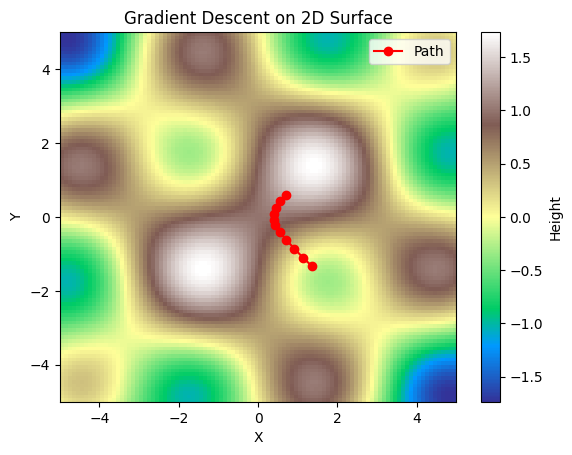

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Generate the grid
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x_vals, y_vals)

# Generate the height map (z-values)
z = np.sin(x) * np.sin(y) + 0.5 * np.cos(0.5 * x) + 0.5 * np.cos(0.5 * y)

# Create an interpolation function for z-values
f_interp = RegularGridInterpolator((x_vals, y_vals), z)

# Function to compute gradient at a specific point
def gradient(f, x, y, dx=1e-6, dy=1e-6):
    dzdx = (f([[x + dx, y]]) - f([[x - dx, y]])) / (2 * dx)
    dzdy = (f([[x, y + dy]]) - f([[x, y - dy]])) / (2 * dy)
    return dzdx[0], dzdy[0]

# Initialize gradient descent parameters
start = [0.7, 0.6]  # Initial point
step_size = 0.4  # Step size
n_steps = 10  # Number of steps

# Initialize path and current point
path = [start]
current_point = np.array(start)

# Perform gradient descent
for _ in range(n_steps):
    dzdx, dzdy = gradient(f_interp, current_point[0], current_point[1])
    current_point -= step_size * np.array([dzdx, dzdy])
    path.append(current_point.copy())

# Convert path to numpy array
path = np.array(path)

# Plotting
plt.figure()
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='terrain', aspect='auto')
plt.colorbar(label='Height')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Path')
plt.title('Gradient Descent on 2D Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


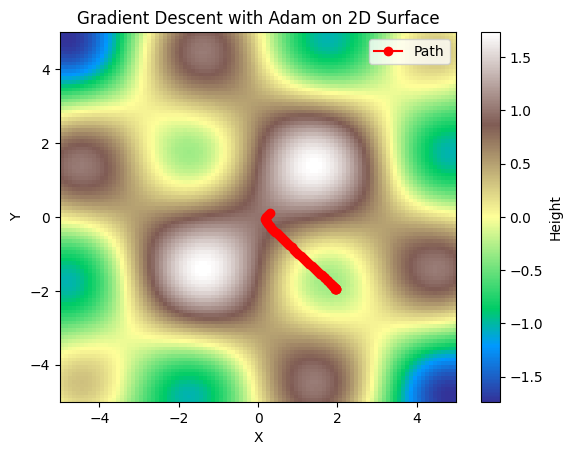

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Generate the grid
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x_vals, y_vals)

# Generate the height map (z-values)
z = np.sin(x) * np.sin(y) + 0.5 * np.cos(0.5 * x) + 0.5 * np.cos(0.5 * y)

# Create an interpolation function for z-values
f_interp = RegularGridInterpolator((x_vals, y_vals), z)

# Function to compute gradient at a specific point
def gradient(f, x, y, dx=1e-6, dy=1e-6):
    dzdx = (f([[x + dx, y]]) - f([[x - dx, y]])) / (2 * dx)
    dzdy = (f([[x, y + dy]]) - f([[x, y - dy]])) / (2 * dy)
    return np.array([dzdx[0], dzdy[0]])

# Initialize Adam optimizer parameters
alpha = 0.05  # learning rate
beta1 = 0.9  # exponential decay rate for the first moment estimates
beta2 = 0.999  # exponential decay rate for the second moment estimates
epsilon = 1e-8  # small constant to avoid division by zero

m = np.zeros(2)  # first moment vector
v = np.zeros(2)  # second moment vector

# Initialize gradient descent parameters
start = [0.3, 0.1]  # Initial point
n_steps = 50  # Number of steps

# Initialize path and current point
path = [np.array(start)]
current_point = np.array(start)

# Perform gradient descent with Adam optimizer
for t in range(1, n_steps + 1):
    grad = gradient(f_interp, current_point[0], current_point[1])

    # Update biased first and second moment estimates
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad ** 2

    # Correct bias in first and second moment estimates
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)

    # Update current point
    current_point = current_point - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
    path.append(current_point.copy())

# Convert path to numpy array
path = np.array(path)

# Plotting
plt.figure()
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='terrain', aspect='auto')
plt.colorbar(label='Height')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Path')
plt.title('Gradient Descent with Adam on 2D Surface')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()